In [217]:
import os
if os.getcwd() == '/home/user/code':
    os.chdir('/home/user/code/nlp2024_ClefTask4SOTA')


%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Runs

In [350]:
from src.content_extraction import format
import pandas as pd
from datetime import datetime

from src.models import ARCHITECTURE, ModelId
from tqdm import tqdm

runs = [
    # "VAL_naive_doctaet-simple_zs-mistralaiMistral7BInstructv03-20240611-095123",
    # "VAL_naive_doctaet-simple_fs-mistralaiMistral7BInstructv03-20240611-102154",
    # "VAL_naive_doctaet-simple_zs-googlegemma7bit-20240611-130659",
    # "VAL_naive_doctaet-simple_fs-googlegemma7bit-20240611-133609",
    # "VAL_naive_doctaet-simple_zs-llama38b-20240611-212642",
    # "VAL_naive_doctaet-simple_fs-llama38b-20240611-213146",
    # "VAL_naive_doctaet-simple_zs-gemma7b-20240612-073229",
    # "VAL_naive_doctaet-simple_fs-gemma7b-20240612-073907",
    # "VAL_naive_doctaet-simple_zs-mistral7b-20240612-074427",
    # "VAL_naive_doctaet-simple_fs-mistral7b-20240612-075256",
    # "VAL_naive_doctaet-simple_zs-llama370b-20240612-083003",
    # "VAL_naive_doctaet-simple_fs-llama370b-20240612-085839",
    # "VAL_naive_doctaet-simple_fs_v2-llama370b-20240612-121227",
    # "VAL_naive_doctaet-few_shot_template_initial-llama370b-20240612-132023",
    # "VAL_naive_doctaet-simple_fs_v2-llama370b-20240612-141913",
    # "VAL_naive_doctaet-simple_fs_v2-llama38b-20240612-151333",
    # "VAL_naive_doctaet-simple_fs_v3-llama38b-20240612-152251",
    # "VAL_naive_doctaet-simple_fs_v2-mistral7b-20240612-153111",
    # "VAL_naive_doctaet-simple_fs_v3-mistral7b-20240612-154022",
    # "VAL_naive_doctaet-simple_fs_v2-gemma7b-20240612-154846",
    # "VAL_naive_doctaet-simple_fs_v3-gemma7b-20240612-155251",
    # "VAL_naive_doctaet-simple_fs_v3-llama370b-20240612-155840",
    "VAL_naive_doctaet-simple_fs_v4a-llama38b-20240612-205302",
    "VAL_naive_doctaet-simple_fs_v4b-llama38b-20240612-210144",
    "VAL_naive_doctaet-simple_fs_v4a-mistral7b-20240613-120035",
    "VAL_naive_doctaet-simple_fs_v4b-mistral7b-20240613-120845",
    "VAL_naive_doctaet-simple_fs_v4a-gemma7b-20240613-121703",
    "VAL_naive_doctaet-simple_fs_v4b-gemma7b-20240613-122128",
    "VAL_naive_doctaet-simple_fs_v4a-gemma2b-20240613-122600",
    "VAL_naive_doctaet-simple_fs_v4b-gemma2b-20240613-123031",
    "VAL_naive_doctaet-few_shot_template_initial-mixtral8x7b-20240613-141202",
    "VAL_naive_doctaet-simple_fs_v4a-mixtral8x7b-20240613-142743",
    "VAL_naive_doctaet-simple_fs_v4b-mixtral8x7b-20240613-144155",
    "VAL_naive_doctaet-few_shot_template_initial-mixtral8x22b-20240613-145709",
    "VAL_naive_doctaet-simple_fs_v4a-mixtral8x22b-20240613-154052",
    "VAL_naive_doctaet-simple_fs_v4b-mixtral8x22b-20240613-162724",
    "VAL_naive_doctaet-simple_fs_v5-mistral7b-20240614-135729",
    "VAL_naive_doctaet-simple_zs_v5-mistral7b-20240614-140615",
    "VAL_naive_doctaet-simple_fs_v5-mistralinstruct-20240614-141648",
    "VAL_naive_doctaet-simple_zs_v5-mistralinstruct-20240614-142530",
    "VAL_naive_doctaet-simple_fs_v5-gemma7b-20240614-143558",
    "VAL_naive_doctaet-simple_zs_v5-gemma7b-20240614-144037",
    "VAL_naive_doctaet-simple_fs_v5-gemma2b-20240614-144546",
    "VAL_naive_doctaet-simple_zs_v5-gemma2b-20240614-145005",
    "VAL_naive_doctaet-simple_fs_v5-llama38b-20240614-145439",
    "VAL_naive_doctaet-simple_zs_v5-llama38b-20240614-150350",
    "VAL_naive_doctaet-simple_fs_v5-llama3instruct-20240614-151321",
    "VAL_naive_doctaet-simple_zs_v5-llama3instruct-20240614-152225",
    "VAL_naive_doctaet-simple_fs_v5-mixtral8x7b-20240614-153154",
    "VAL_naive_doctaet-simple_zs_v5-mixtral8x7b-20240614-154513",
    "VAL_naive_doctaet-simple_fs_v5-llama370b-20240614-182704",
    "VAL_naive_doctaet-simple_zs_v5-llama370b-20240614-191754",
    "VAL_naive_doctaet-simple_fs_v5-mixtral8x22b-20240614-202109",
    "VAL_naive_doctaet-simple_zs_v5-mixtral8x22b-20240614-221934",
    "VAL_naive_doctaet-few_shot_template_initial-mixtral8x22b-20240615-082748",
    "VAL_naive_doctaet-few_shot_template_optimized01-mixtral8x22b-20240615-090848",
    "VAL_naive_doctaet-few_shot_template_initial-llama370b-20240615-095322",
    "VAL_naive_doctaet-few_shot_template_optimized01-llama370b-20240615-104450",
    "VAL_naive_doctaet-simple_fs_v5-mixtral8x22b-20240615-200605"
]

def size_category(size):
    if size == "2b":
        return "smallest"
    elif size in ["7b", "8b", "8x7b"]:
        return "small"
    elif size in ["8x22b", "70b"]:
        return "large"
    else:
        return size
    
def load_run(run):
    template, model_id, date = run.rsplit("-", 4)[1], run.rsplit("-", 4)[2], run.rsplit("-", 4)[3] + run.rsplit("-", 4)[4]
    path = f"results/{run}/df.feather"

    df = pd.read_feather(path)
    df["model"] = model_id
    df["prompt_template"] = template
    model = get_Architecture(model_id)
    df["size"] = model.size
    df["class"] = size_category(model.size)
    df["architecture"] = model.architecture
    df["flavour"] = model.flavour
    df["date"] = datetime.strptime(date, "%Y%m%d%H%M%S")
    try:
        df = df.rename({"annontation": "annotation"}, axis=1) # typo in early versions
    except:
        pass
    return df


def strip_name(name):
    return ''.join([c for c in name if c.isalnum()])

def get_Architecture(model_name)->ModelId:
    for k in ARCHITECTURE.__dict__.keys():
        try:
            if model_name in [strip_name(ARCHITECTURE.__dict__[k].ollama), strip_name(ARCHITECTURE.__dict__[k].hf)]:
                return ARCHITECTURE.__dict__[k]
        except:
            pass
    return ModelId("None", "None", "None", "None", "None")



def post_proc(df):
    df["annotation"] = df["raw"].apply(format)
    # df["new_format"] = df["raw"].apply(lambda x: any(term in x.lower() for term in ["cannot generate", "cannot extract", "not possible", "there are no"]))
    df["annotation"] = df["annotation"].astype(pd.StringDtype())
    df["ground_truth"] = df["ground_truth"].astype(pd.StringDtype())
    return df

dfs = []

for run in runs:
    df = load_run(run)
    df = post_proc(df)
    dfs.append(df)


# Some older runs might not be in the right format -> format function is idempotent
# for df in dfs:
#     df = post_proc(df)



In [351]:
df_all = pd.concat(dfs)
# d = df_all[["raw", "new_format", "run", "date"]]
# d
df_all

,run,f,annotation,prompt,raw,ground_truth,inference_s,model,prompt_template,size,class,architecture,flavour,date
0,VAL_naive_doctaet-simple_fs_v4a-llama38b-20240...,1503.05062,unanswerable,"If the text reports benchmark results, extract...",No entries were found in the provided text. Th...,unanswerable,6.582750,llama38b,simple_fs_v4a,8b,small,Llama,vanilla,2024-06-12 20:53:02
1,VAL_naive_doctaet-simple_fs_v4a-llama38b-20240...,1109.0784,unanswerable,"If the text reports benchmark results, extract...",Since the provided text does not report benchm...,unanswerable,0.825765,llama38b,simple_fs_v4a,8b,small,Llama,vanilla,2024-06-12 20:53:02
2,VAL_naive_doctaet-simple_fs_v4a-llama38b-20240...,2210.16422v1,[ {'LEADERBOARD':{'Task': 'Long document extra...,"If the text reports benchmark results, extract...","Based on the provided text, I extracted the fo...",[{'LEADERBOARD': {'Task': 'Text Summarization'...,9.037052,llama38b,simple_fs_v4a,8b,small,Llama,vanilla,2024-06-12 20:53:02
3,VAL_naive_doctaet-simple_fs_v4a-llama38b-20240...,2310.07488v2,"[ {'LEADERBOARD':{ 'Task': 'KMath', 'Dataset':...","If the text reports benchmark results, extract...","Based on the provided text, I extracted the re...",[{'LEADERBOARD': {'Task': 'Arithmetic Reasonin...,5.994259,llama38b,simple_fs_v4a,8b,small,Llama,vanilla,2024-06-12 20:53:02
4,VAL_naive_doctaet-simple_fs_v4a-llama38b-20240...,2210.15425v1,[ {'LEADERBOARD': {'Task': 'Wake-word Detectio...,"If the text reports benchmark results, extract...",Here are the extracted leaderboard entries:\n\...,"[{'LEADERBOARD': {'Task': 'Keyword Spotting', ...",3.954267,llama38b,simple_fs_v4a,8b,small,Llama,vanilla,2024-06-12 20:53:02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,VAL_naive_doctaet-simple_fs_v5-mixtral8x22b-20...,2006.09264v3,[{'LEADERBOARD': {'Task': 'Neural Architecture...,"If the text reports benchmark results, extract...","[\n {""Task"": ""Neural Architecture Search (...",[{'LEADERBOARD': {'Task': 'Neural Architecture...,7.442998,mixtral8x22b,simple_fs_v5,8x22b,large,Mixtral,vanilla,2024-06-15 20:06:05
96,VAL_naive_doctaet-simple_fs_v5-mixtral8x22b-20...,1304.2639,unanswerable,"If the text reports benchmark results, extract...",[]\n\nThe provided text does not contain any ...,unanswerable,3.091073,mixtral8x22b,simple_fs_v5,8x22b,large,Mixtral,vanilla,2024-06-15 20:06:05
97,VAL_naive_doctaet-simple_fs_v5-mixtral8x22b-20...,1803.10683v3,[{'LEADERBOARD': {'Task': 'Instance Segmentati...,"If the text reports benchmark results, extract...","[\n {\n ""Task"": ""Instance Segmentatio...","[{'LEADERBOARD': {'Task': 'Pose Estimation', '...",48.937378,mixtral8x22b,simple_fs_v5,8x22b,large,Mixtral,vanilla,2024-06-15 20:06:05
98,VAL_naive_doctaet-simple_fs_v5-mixtral8x22b-20...,2006.06936v2,[{'LEADERBOARD': {'Task': 'Pre-training Perfor...,"If the text reports benchmark results, extract...","[\n {\n ""Task"": ""Pre-training Perform...",[{'LEADERBOARD': {'Task': 'Neural Architecture...,40.117476,mixtral8x22b,simple_fs_v5,8x22b,large,Mixtral,vanilla,2024-06-15 20:06:05


# Evaluation

In [352]:
# evaluate
from scoring_program.evaluation import Metrics


results = []
for df in tqdm(dfs):
    labels = list(df["ground_truth"])
    preds = list(df["annotation"])
    assert len(labels) == len(preds)
    result = Metrics.evaluate_property_wise_json_based(
        label_list=labels, prediction_list=preds
    )

    result.update(
        Metrics.evaluate_rouge(label_list=list(df["ground_truth"]), prediction_list=list(df["annotation"]))
    )
    result["run"] = df["run"].iloc[0]
    result["score"] = result["partial_f1s_overall"]
    result["num_samples"] = len(df)
    result["prompt_template"] = df.iloc[0]["prompt_template"]
    result["model"] = df.iloc[0]["model"]
    model = get_Architecture(df.iloc[0]["model"])
    result["size"] = model.size
    result["class"] = size_category(model.size)
    result["architecture"] = model.architecture
    result["flavour"] = model.flavour
    result["model_pretty"] = f"{model.architecture} {model.size}"
    try:
        result["mean_t"] = df["inference_s"].mean()
    except:
        pass
    results.append(pd.DataFrame([result]))

df_res = pd.concat(results)
df_res

100%|████████████████████████████████████████████| 37/37 [01:52<00:00,  3.04s/it]


,general_accuracy,exact_recalls_task,exact_recalls_dataset,exact_recalls_metric,exact_recalls_Score,exact_recalls_overall,partial_recalls_task,partial_recalls_dataset,partial_recalls_metric,partial_recalls_Score,...,score,num_samples,prompt_template,model,size,class,architecture,flavour,model_pretty,mean_t
0,84.0,2.96,19.70,16.75,6.40,11.45,7.88,25.12,20.20,7.28,...,15.75,100,simple_fs_v4a,llama38b,8b,small,Llama,vanilla,Llama 8b,5.217605
0,76.0,5.91,14.29,11.82,3.94,8.99,8.37,17.73,15.76,5.34,...,11.46,100,simple_fs_v4b,llama38b,8b,small,Llama,vanilla,Llama 8b,5.274975
0,56.0,11.82,20.20,17.24,9.85,14.78,19.21,22.66,21.67,10.19,...,15.71,100,simple_fs_v4a,mistral7b,7b,small,Mistral,vanilla,Mistral 7b,4.891713
0,51.0,8.37,17.24,11.33,10.34,11.82,11.82,19.70,14.78,10.19,...,11.02,100,simple_fs_v4b,mistral7b,7b,small,Mistral,vanilla,Mistral 7b,4.968778
0,56.0,0.00,0.00,1.48,0.00,0.37,0.00,0.00,1.48,0.00,...,0.70,100,simple_fs_v4a,gemma7b,7b,small,Gemma,vanilla,Gemma 7b,2.633938
0,51.0,0.00,0.00,1.48,0.00,0.37,0.00,0.00,1.48,0.00,...,0.64,100,simple_fs_v4b,gemma7b,7b,small,Gemma,vanilla,Gemma 7b,2.716475
0,77.0,0.49,0.99,2.46,0.49,1.11,0.49,1.97,3.45,0.49,...,2.67,100,simple_fs_v4a,gemma2b,2b,smallest,Gemma,vanilla,Gemma 2b,2.694693
0,45.0,0.99,2.96,3.45,0.00,1.85,1.48,2.96,3.45,0.00,...,2.15,100,simple_fs_v4b,gemma2b,2b,smallest,Gemma,vanilla,Gemma 2b,2.566375
0,73.0,17.73,29.56,21.67,14.78,20.94,21.18,30.54,24.63,15.05,...,16.53,100,few_shot_template_initial,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,9.401801
0,81.0,13.79,25.12,16.75,10.84,16.63,18.72,26.11,19.70,11.17,...,15.57,100,simple_fs_v4a,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,8.504601


In [353]:
competition_leader = {
    "general_accuracy": 85.93,
    "rouge1": 73.72,
    "rouge2": 6.07,
    "rougeL": 72.72,
    "rougeLsum":72.57,
    "exact_f1s_task":10.01,
    "exact_precisions_task":11.49,
    "exact_recalls_task":8.87,
    "partial_f1s_task": 16.12,
    "partial_precisions_task":18.50,
    "partial_recalls_task":14.28,
    "exact_f1s_dataset":13.16,
    "exact_precisions_dataset":15.10,
    "exact_recalls_dataset":11.66,
    "partial_f1s_dataset": 17.12,
    "partial_precisions_dataset":19.65,
    "partial_recalls_dataset":15.17,
    "exact_f1s_metric":11.65,
    "exact_precisions_metric":13.37,
    "exact_recalls_metric":10.32,
    "partial_f1s_metric": 13.72,
    "partial_precisions_metric":15.75,
    "partial_recalls_metric":12.16,
    "exact_f1s_Score":9.85,
    "exact_precisions_Score":11.30,
    "exact_recalls_Score":8.72,
    "partial_f1s_Score": 11.10,
    "partial_precisions_Score":13.06,
    "partial_recalls_Score":9.65,
    "exact_f1s_overall":11.16,
    "exact_precisions_overall":12.82,
    "exact_recalls_overall":9.89,
    "partial_f1s_overall": 14.52,
    "partial_precisions_overall":16.74,
    "partial_recalls_overall":12.81,
    "run": "competition_leader",
    'score': 14.52,
    'num_samples': "789",
    'prompt_template': "",
    'model': "Competition Leader",
    'size': "",
    'class': "", 
    'architecture': "Competition Leader", 
    'flavour': "",
    'model_pretty': "Competition Leader",
    'mean_t': ""
}

df_res = df_res.append(competition_leader, ignore_index=True)

In [336]:
competition_leader = df_dist[df_dist["run"] == "competition_leader"].iloc[0]
# df_dist.set_index("run")
df_dist = (df_dist[metrics_short] - competition_leader[metrics_short]).merge(df_dist, left_index=True, right_index=True, suffixes=(" dist", None))


In [337]:
all_metrics = [c for c in df_res.columns if any([m in c for m in ["partial", "exact", "rouge", "general"]])]
metadata = list(set(df_res.columns) - set(all_metrics))
task_2_f1s = [m for m in all_metrics if "f1" in m]
task_1 = ["general_accuracy"]

all_metrics_dist = [m + " dist" for m in all_metrics]
task_2_f1s_dist = [m + " dist" for m in task_2_f1s]
task_1_dist = [m + " dist" for m in task_1]

In [338]:
best_runs = [
    "TEST_naive_doctaet-few_shot_template_initial-llama370b-20240615-200335",
    "VAL_naive_doctaet-simple_fs_v4a-mixtral8x22b-20240613-154052",
    "VAL_naive_doctaet-few_shot_template_initial-mixtral8x22b-20240613-145709",
    "VAL_naive_doctaet-few_shot_template_initial-llama370b-20240615-095322",
    "VAL_naive_doctaet-simple_fs_v5-mixtral8x7b-20240614-153154",
    "competition_leader"
]

# Baseline

In [348]:
# data prep
df_baseline = df_res[(df_res["prompt_template"] == "simple_zs_v5") & (df_res["class"] == "small")]

print(df_baseline.sort_values("general_accuracy")[["model_pretty"] + task_2_f1s].to_latex())

\begin{tabular}{llrrrrrrrrrr}
\toprule
{} &  model\_pretty &  exact\_f1s\_task &  exact\_f1s\_dataset &  exact\_f1s\_metric &  exact\_f1s\_Score &  exact\_f1s\_overall &  partial\_f1s\_task &  partial\_f1s\_dataset &  partial\_f1s\_metric &  partial\_f1s\_Score &  partial\_f1s\_overall \\
\midrule
0 &    Mistral 7b &            9.92 &               9.39 &              8.73 &             3.01 &               7.77 &             11.43 &                 9.70 &               11.45 &               4.35 &                 9.23 \\
0 &    Mistral 7b &            9.92 &               9.39 &              8.73 &             3.01 &               7.77 &             11.43 &                 9.70 &               11.45 &               4.35 &                 9.23 \\
0 &  Mixtral 8x7b &            8.79 &              12.52 &             14.29 &             6.59 &              10.55 &             13.46 &                13.35 &               15.38 &               7.73 &                12.49 \\
0 &      Gemma

In [349]:
# data prep
df_baseline = df_res[(df_res["prompt_template"] == "simple_zs_v5") & (df_res["class"] == "small")]

print(df_baseline.sort_values("general_accuracy")[["model_pretty"] + task_1].to_latex())

\begin{tabular}{llr}
\toprule
{} &  model\_pretty &  general\_accuracy \\
\midrule
0 &    Mistral 7b &              53.0 \\
0 &    Mistral 7b &              53.0 \\
0 &  Mixtral 8x7b &              60.0 \\
0 &      Gemma 7b &              63.0 \\
0 &      Llama 8b &              68.0 \\
0 &      Llama 8b &              68.0 \\
\bottomrule
\end{tabular}



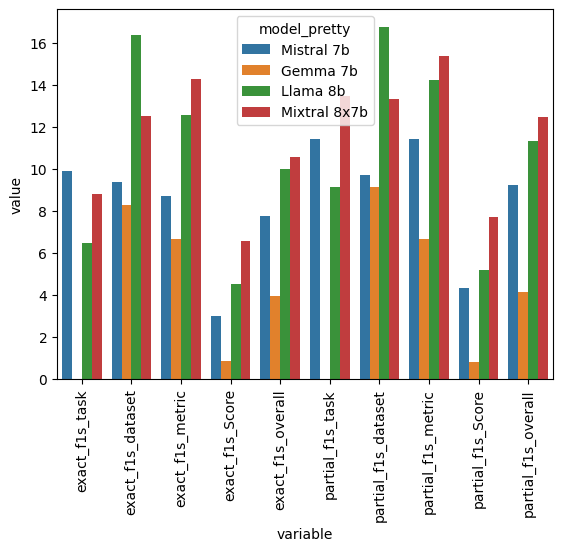

In [345]:
# t1 performance
df_plot = df_baseline[task_2_f1s + metadata]
df_plot = df_plot.melt(id_vars=metadata, value_vars=task_2_f1s)

sns.barplot(df_plot, x="variable", y="value", hue="model_pretty")
_ = plt.xticks(rotation=90)

In [327]:
df_plot

,mean_t,class,model_pretty,model,run,size,score,prompt_template,num_samples,flavour,architecture,variable,value
0,6.318841,small,Mistral 7b,mistral7b,VAL_naive_doctaet-simple_zs_v5-mistral7b-20240...,7b,9.23,simple_zs_v5,100,vanilla,Mistral,exact_f1s_task,9.92
1,6.266982,small,Mistral 7b,mistralinstruct,VAL_naive_doctaet-simple_zs_v5-mistralinstruct...,7b,9.23,simple_zs_v5,100,Instruct,Mistral,exact_f1s_task,9.92
2,3.082549,small,Gemma 7b,gemma7b,VAL_naive_doctaet-simple_zs_v5-gemma7b-2024061...,7b,4.15,simple_zs_v5,100,vanilla,Gemma,exact_f1s_task,0.00
3,2.731261,smallest,Gemma 2b,gemma2b,VAL_naive_doctaet-simple_zs_v5-gemma2b-2024061...,2b,5.92,simple_zs_v5,100,vanilla,Gemma,exact_f1s_task,1.53
4,5.697149,small,Llama 8b,llama38b,VAL_naive_doctaet-simple_zs_v5-llama38b-202406...,8b,11.35,simple_zs_v5,100,vanilla,Llama,exact_f1s_task,6.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,9.872336,small,Mixtral 8x7b,mixtral8x7b,VAL_naive_doctaet-simple_zs_v5-mixtral8x7b-202...,8x7b,12.49,simple_zs_v5,100,vanilla,Mixtral,partial_f1s_overall,12.49
106,38.972768,large,Llama 70b,llama370b,VAL_naive_doctaet-simple_zs_v5-llama370b-20240...,70b,12.46,simple_zs_v5,25,vanilla,Llama,partial_f1s_overall,12.46
107,27.484981,large,Mixtral 8x22b,mixtral8x22b,VAL_naive_doctaet-simple_zs_v5-mixtral8x22b-20...,8x22b,14.20,simple_zs_v5,100,vanilla,Mixtral,partial_f1s_overall,14.20
108,unknown,unknown,Competition Leader,Competition Leader,competition_leader,unknown,14.52,unknown,789,unknown,Competition Leader,partial_f1s_overall,14.52


In [292]:
# df_dist = df_res[df_res["run"].isin(best_runs)]
df_dist = df_res

competition_leader = df_dist[df_dist["run"] == "competition_leader"].iloc[1]
df_dist.set_index("run")
df_dist = (df_dist[metrics_short] - competition_leader[metrics_short]).merge(df_dist, left_index=True, right_index=True, suffixes=(" dist", None))
df_dist



,exact_f1s_task dist,exact_f1s_dataset dist,exact_f1s_metric dist,exact_f1s_Score dist,exact_f1s_overall dist,partial_f1s_task dist,partial_f1s_dataset dist,partial_f1s_metric dist,partial_f1s_Score dist,partial_f1s_overall dist,...,score,num_samples,prompt_template,model,size,class,architecture,flavour,model_pretty,mean_t
0,-6.99,7.67,5.48,-3.22,0.75,-8.08,9.44,6.93,-3.37,1.23,...,15.75,100,simple_fs_v4a,llama38b,8b,small,Llama,vanilla,Llama 8b,5.217605
1,-4.42,0.75,-0.08,-6.04,-2.44,-8.19,0.15,1.7,-5.86,-3.06,...,11.46,100,simple_fs_v4b,llama38b,8b,small,Llama,vanilla,Llama 8b,5.274975
2,-0.19,3.64,2.66,-1.67,1.12,-0.17,1.73,4.28,-1.22,1.19,...,15.71,100,simple_fs_v4a,mistral7b,7b,small,Mistral,vanilla,Mistral 7b,4.891713
3,-3.74,-0.03,-2.97,-2.1,-2.2,-7.26,-2.11,-2.4,-2.29,-3.5,...,11.02,100,simple_fs_v4b,mistral7b,7b,small,Mistral,vanilla,Mistral 7b,4.968778
4,-10.01,-13.16,-8.85,-9.85,-10.46,-16.12,-17.12,-10.92,-11.1,-13.82,...,0.70,100,simple_fs_v4a,gemma7b,7b,small,Gemma,vanilla,Gemma 7b,2.633938
5,-10.01,-13.16,-9.11,-9.85,-10.52,-16.12,-17.12,-11.18,-11.1,-13.88,...,0.64,100,simple_fs_v4b,gemma7b,7b,small,Gemma,vanilla,Gemma 7b,2.716475
6,-9.19,-11.51,-7.53,-9.03,-9.31,-15.3,-13.83,-7.96,-10.3,-11.85,...,2.67,100,simple_fs_v4a,gemma2b,2b,smallest,Gemma,vanilla,Gemma 2b,2.694693
7,-8.93,-9.93,-7.89,-9.85,-9.14,-14.51,-13.89,-9.96,-11.1,-12.37,...,2.15,100,simple_fs_v4b,gemma2b,2b,smallest,Gemma,vanilla,Gemma 2b,2.566375
8,2.87,8.31,4.09,0.88,4.05,-0.74,5.06,4.17,-0.45,2.01,...,16.53,100,few_shot_template_initial,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,9.401801
9,1.35,7.53,2.23,-0.93,2.55,-0.7,4.38,2.61,-2.06,1.05,...,15.57,100,simple_fs_v4a,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,8.504601


/home/user/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 10.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/user/.venv/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


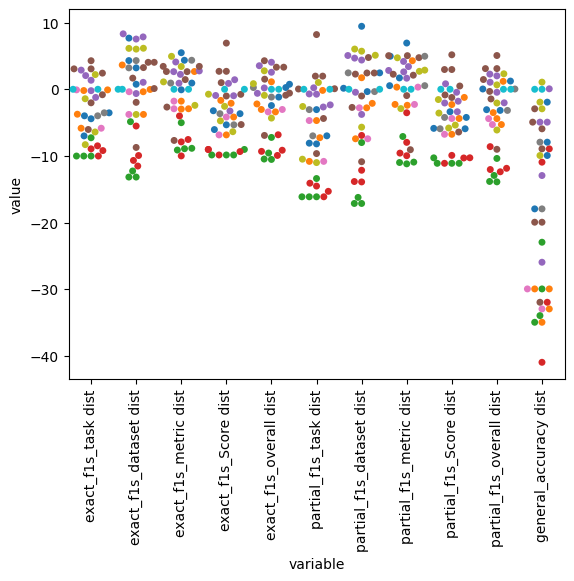

In [299]:
df_dist["run_pretty"] = df_dist.apply(lambda row: f'{row["architecture"]} {row["size"]} {row["prompt_template"]}', axis=1)
df_exp = df_dist.melt(id_vars="model", value_vars=[m+ " dist"for m in metrics_short])

sns.swarmplot(df_exp, x="variable", y="value", hue="model")
_ = plt.xticks(rotation=90)
plt.legend([],[], frameon=False)

# Few Shot vs Zero Shot

<Axes: xlabel='model', ylabel='prompt_template'>

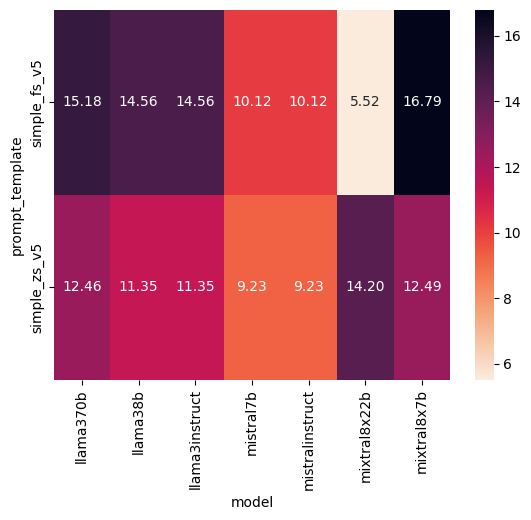

: 

In [ ]:
import seaborn as sns

df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v5", "simple_zs_v5"])]
df_exp = df_exp.pivot(index="prompt_template", columns="model", values="score")

sns.heatmap(df_exp, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")

<Axes: xlabel='model', ylabel='prompt_template'>

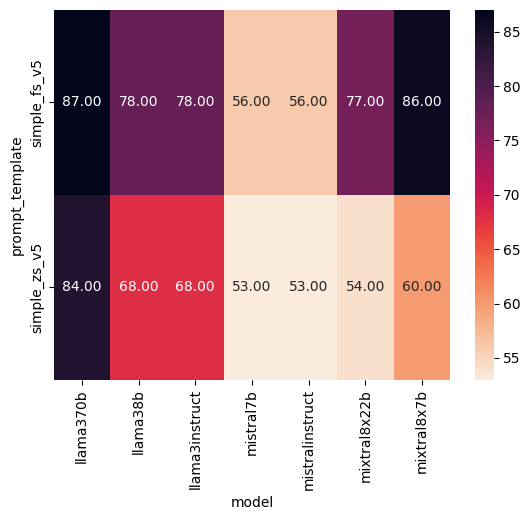

: 

: 

In [ ]:
import seaborn as sns

df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v5", "simple_zs_v5"])]
df_exp = df_exp.pivot(index="prompt_template", columns="model", values="general_accuracy")

sns.heatmap(df_exp, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")

In [ ]:
df_exp

,general_accuracy,exact_recalls_task,exact_recalls_dataset,exact_recalls_metric,exact_recalls_Score,exact_recalls_overall,partial_recalls_task,partial_recalls_dataset,partial_recalls_metric,partial_recalls_Score,...,score,num_samples,prompt_template,model,size,class,architecture,flavour,model_pretty,mean_t
0,68.0,8.37,20.20,14.78,5.42,12.19,11.82,20.69,16.75,6.31,...,11.35,100,simple_zs_v5,llama38b,8b,small,Llama,vanilla,Llama 8b,5.697149
0,54.0,1.48,7.39,7.39,0.49,4.19,1.97,9.85,9.85,0.97,...,5.92,100,simple_zs_v5,gemma2b,2b,smallest,Gemma,vanilla,Gemma 2b,2.731261
0,84.0,4.55,47.73,43.18,9.09,26.14,13.64,56.82,43.18,13.64,...,12.46,25,simple_zs_v5,llama370b,70b,large,Llama,vanilla,Llama 70b,38.972768
0,60.0,15.76,22.17,25.62,11.82,18.84,24.14,23.65,27.59,12.62,...,12.49,100,simple_zs_v5,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,9.872336
0,68.0,8.37,20.20,14.78,5.42,12.19,11.82,20.69,16.75,6.31,...,11.35,100,simple_zs_v5,llama3instruct,8b,small,Llama,Instruct,Llama 8b,5.680926
0,53.0,16.26,14.78,14.29,4.93,12.56,18.72,15.27,18.72,6.80,...,9.23,100,simple_zs_v5,mistral7b,7b,small,Mistral,vanilla,Mistral 7b,6.318841
0,54.0,14.29,17.24,20.20,13.30,16.26,25.12,22.17,24.63,15.05,...,14.20,100,simple_zs_v5,mixtral8x22b,8x22b,large,Mixtral,vanilla,Mixtral 8x22b,27.484981
0,63.0,0.00,4.93,3.94,0.49,2.34,0.00,5.42,3.94,0.49,...,4.15,100,simple_zs_v5,gemma7b,7b,small,Gemma,vanilla,Gemma 7b,3.082549
0,53.0,16.26,14.78,14.29,4.93,12.56,18.72,15.27,18.72,6.80,...,9.23,100,simple_zs_v5,mistralinstruct,7b,small,Mistral,Instruct,Mistral 7b,6.266982
0,75.0,0.00,1.48,0.99,0.49,0.74,0.00,2.96,2.46,0.49,...,2.49,100,simple_fs_v5,gemma2b,2b,smallest,Gemma,vanilla,Gemma 2b,2.568866


: 

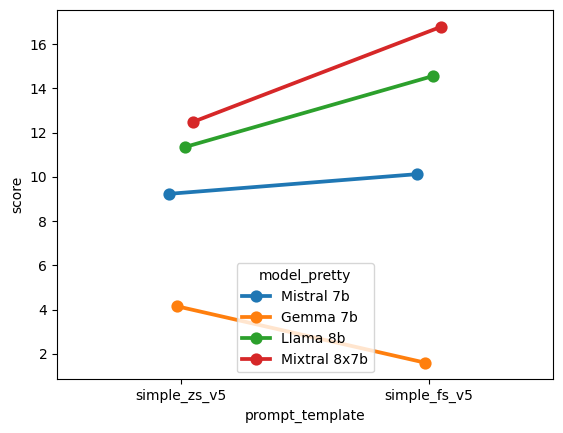

In [354]:
df_exp = df_res[df_res["prompt_template"].isin([ "simple_zs_v5", "simple_fs_v5"]) & (df_res["class"] == "small")].sort_values(by="prompt_template", ascending=False)
sns.pointplot(data=df_exp, x="prompt_template", y="score", hue="model_pretty", dodge=True)

plt.savefig("imgs/t2_zs-fs.png")

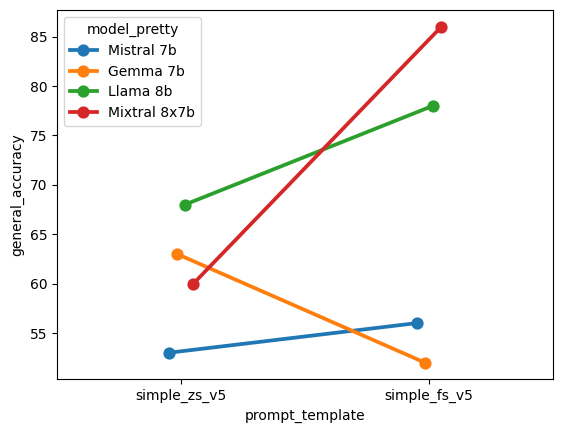

: 

In [ ]:
df_exp = df_res[df_res["prompt_template"].isin([ "simple_zs_v5", "simple_fs_v5"]) & (df_res["class"] == "small")].sort_values(by="prompt_template", ascending=False)
sns.pointplot(data=df_exp, x="prompt_template", y="general_accuracy", hue="model_pretty", dodge=True)

plt.savefig("imgs/t1_zs-fs.png")

# Size

<Axes: xlabel='class', ylabel='architecture'>

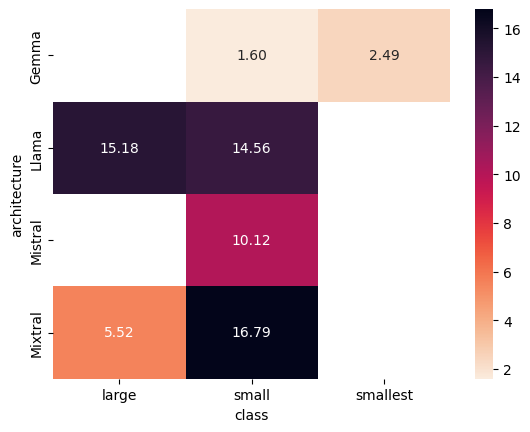

: 

In [ ]:
import seaborn as sns

df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v5"]) & df_res["flavour"].isin(["vanilla"])]
df_exp = df_exp.pivot(index="architecture", columns="class", values="score")

sns.heatmap(df_exp, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")

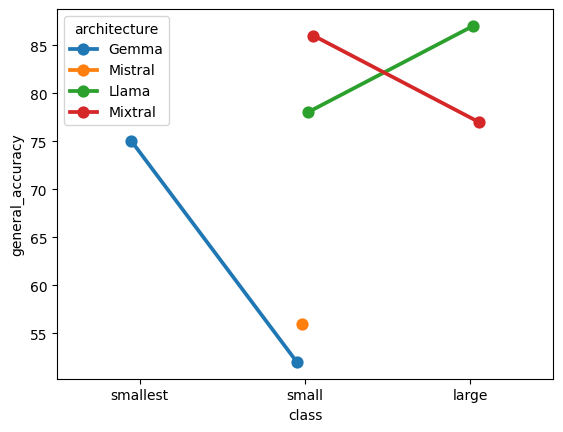

In [355]:
import matplotlib.pyplot as plt

df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v5"])].sort_values(by="class", ascending=False)
sns.pointplot(data=df_exp, x="class", y="general_accuracy", hue="architecture", dodge=True)

plt.savefig("imgs/t1_sizeclass.png")

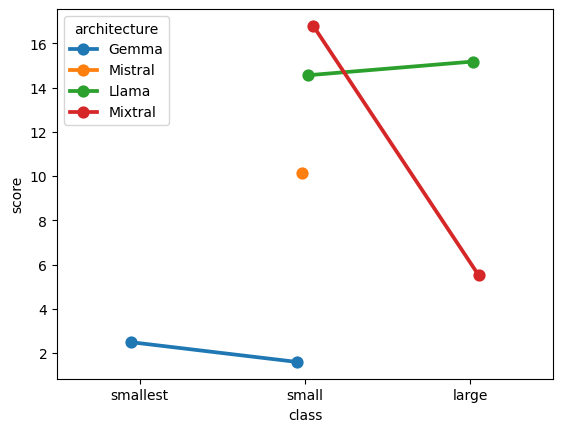

In [356]:
import matplotlib.pyplot as plt

df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v5"])].sort_values(by="class", ascending=False)
sns.pointplot(data=df_exp, x="class", y="score", hue="architecture", dodge=True)

plt.savefig("imgs/t2_sizeclass.png")

# all models all prompts
confusion matrix heatmap intensity is score

In [ ]:
df_res

,general_accuracy,exact_recalls_task,exact_recalls_dataset,exact_recalls_metric,exact_recalls_Score,exact_recalls_overall,partial_recalls_task,partial_recalls_dataset,partial_recalls_metric,partial_recalls_Score,...,score,num_samples,prompt_template,model,size,class,architecture,flavour,model_pretty,mean_t
0,84.0,2.96,19.70,16.75,6.40,11.45,7.88,25.12,20.20,7.28,...,15.75,100,simple_fs_v4a,llama38b,8b,small,Llama,vanilla,Llama 8b,5.217605
0,76.0,5.91,14.29,11.82,3.94,8.99,8.37,17.73,15.76,5.34,...,11.46,100,simple_fs_v4b,llama38b,8b,small,Llama,vanilla,Llama 8b,5.274975
0,56.0,11.82,20.20,17.24,9.85,14.78,19.21,22.66,21.67,10.19,...,15.71,100,simple_fs_v4a,mistral7b,7b,small,Mistral,vanilla,Mistral 7b,4.891713
0,51.0,8.37,17.24,11.33,10.34,11.82,11.82,19.70,14.78,10.19,...,11.02,100,simple_fs_v4b,mistral7b,7b,small,Mistral,vanilla,Mistral 7b,4.968778
0,73.0,17.73,29.56,21.67,14.78,20.94,21.18,30.54,24.63,15.05,...,16.53,100,few_shot_template_initial,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,9.401801
0,81.0,13.79,25.12,16.75,10.84,16.63,18.72,26.11,19.70,11.17,...,15.57,100,simple_fs_v4a,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,8.504601
0,81.0,15.76,22.66,20.20,14.29,18.23,22.17,26.60,26.60,15.05,...,14.07,100,simple_fs_v4b,mixtral8x7b,8x7b,small,Mixtral,vanilla,Mixtral 8x7b,9.130037
0,66.0,19.21,25.12,22.17,18.23,21.18,26.60,28.57,27.59,19.42,...,17.62,100,few_shot_template_initial,mixtral8x22b,8x22b,large,Mixtral,vanilla,Mixtral 8x22b,26.215657
0,83.0,18.23,20.69,18.23,20.69,19.46,31.03,27.59,20.20,21.36,...,19.58,100,simple_fs_v4a,mixtral8x22b,8x22b,large,Mixtral,vanilla,Mixtral 8x22b,27.911258
0,81.0,16.26,19.21,18.72,11.82,16.50,21.18,25.12,24.14,12.62,...,15.98,100,simple_fs_v4b,mixtral8x22b,8x22b,large,Mixtral,vanilla,Mixtral 8x22b,74.403017


: 

: 

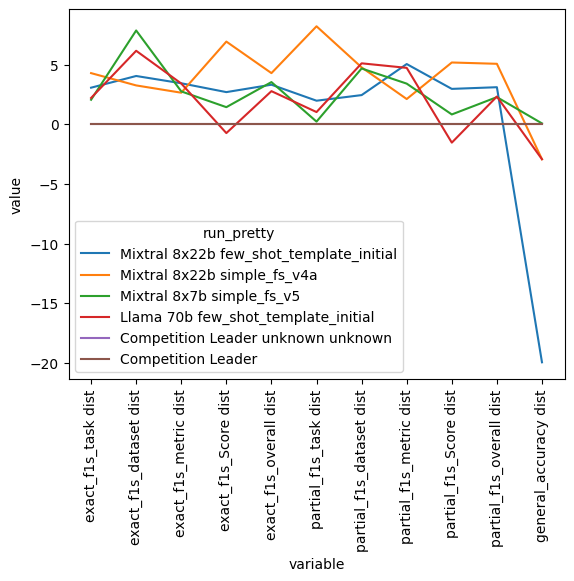

In [286]:
df_dist["exact_f1s_dataset dist"]

11    4.04
12    3.25
26    7.85
34    6.15
36     0.0
37     0.0
Name: exact_f1s_dataset dist, dtype: object

/tmp/ipykernel_847972/3606457366.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exp["run_pretty"] = df_exp.apply(lambda row: f'{row["architecture"]} {row["size"]} {row["prompt_template"]}', axis=1)


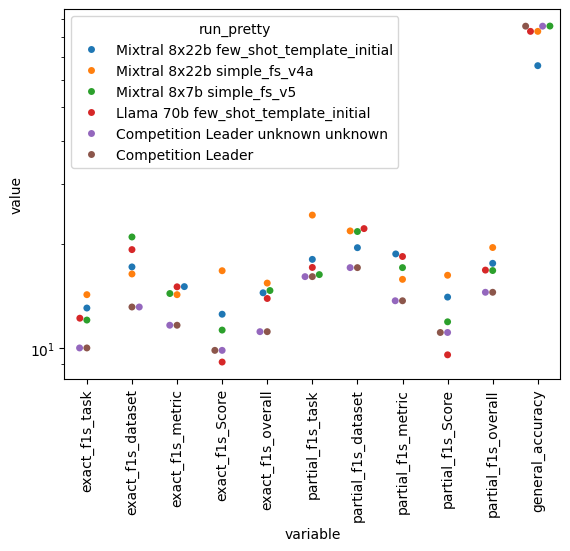

In [257]:
import seaborn as sns
import matplotlib.pyplot as plt

df_exp = df_res[df_res["run"].isin(best_runs)]
df_exp["run_pretty"] = df_exp.apply(lambda row: f'{row["architecture"]} {row["size"]} {row["prompt_template"]}', axis=1)
df_exp = df_exp.melt(id_vars="run_pretty", value_vars=metrics_short)


sns.swarmplot(df_exp, x="variable", y="value", hue="run_pretty", log_scale=True)
_ = plt.xticks(rotation=90)


<Axes: xlabel='prompt_template', ylabel='model'>

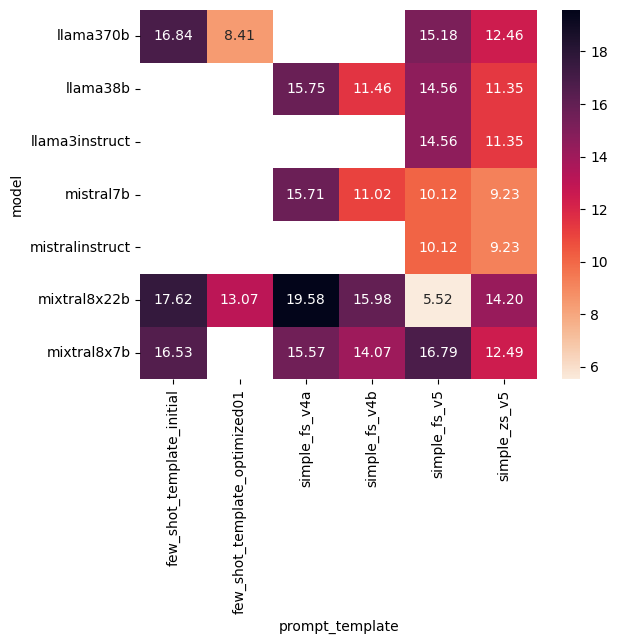

: 

In [ ]:
import seaborn as sns

# df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v5"]) & df_res["flavour"].isin(["vanilla"])]
df_exp = df_res.groupby(["model", "prompt_template"]).last().reset_index().pivot(index="model", columns="prompt_template", values="score")

sns.heatmap(df_exp, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")

# Alternative demostration

<Axes: xlabel='prompt_template', ylabel='model_pretty'>

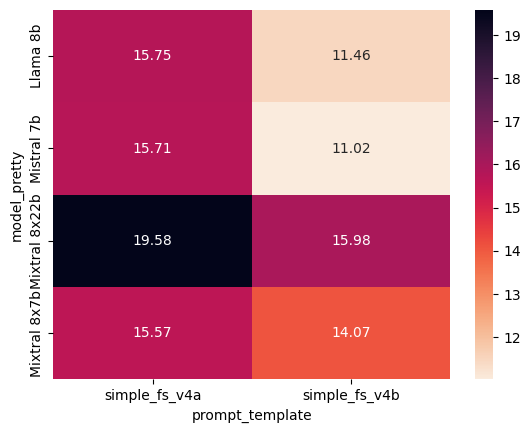

: 

In [ ]:
import seaborn as sns

df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v4a", "simple_fs_v4b" ]) & df_res["flavour"].isin(["vanilla"])]
df_exp = df_exp.pivot(index="model_pretty", columns="prompt_template", values="score")

sns.heatmap(df_exp, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")

<Axes: xlabel='prompt_template', ylabel='score'>

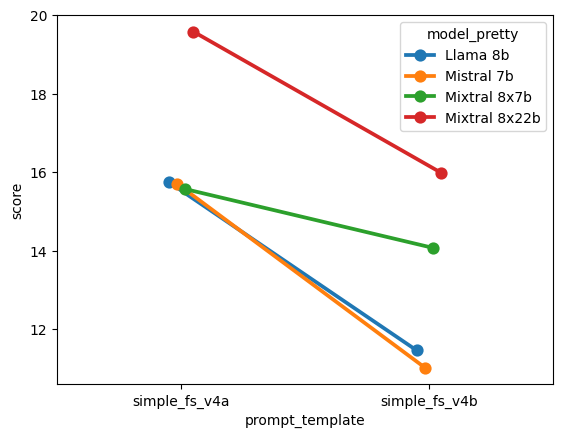

: 

In [ ]:
df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v4a", "simple_fs_v4b" ])& df_res["flavour"].isin(["vanilla"])].sort_values(by="prompt_template", ascending=True)
sns.pointplot(data=df_exp, x="prompt_template", y="score", hue="model_pretty", dodge=True)

: 

# Vanilla vs Instruct on the same prompt

<Axes: xlabel='flavour', ylabel='model_pretty'>

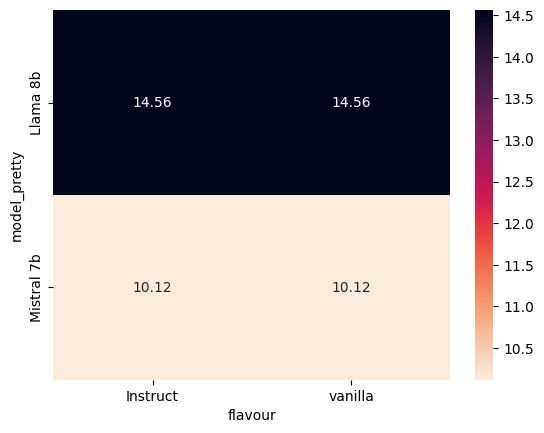

: 

In [ ]:
import seaborn as sns

df_exp = df_res[df_res["prompt_template"].isin(["simple_fs_v5"]) & df_res["size"].isin(["7b", "8b"])]
df_exp = df_exp.pivot(index="model_pretty", columns="flavour", values="score")

sns.heatmap(df_exp, annot=True, cmap=sns.cm.rocket_r, fmt=".2f")

# Else

<Axes: xlabel='inference_s', ylabel='size'>

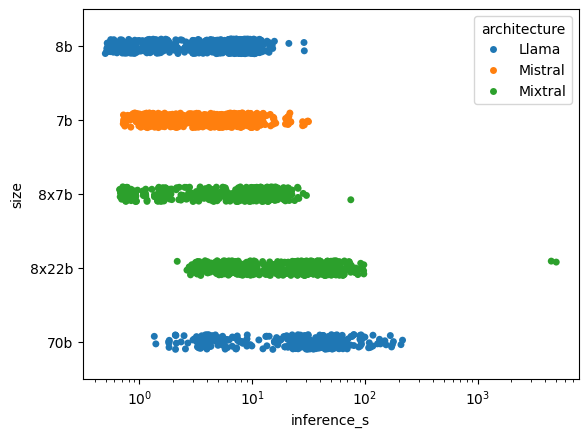

: 

In [ ]:
import seaborn as sns

sns.stripplot(df_all.fillna(0), x="inference_s", y="size", hue="architecture", log_scale=True)

<Axes: xlabel='prompt_template', ylabel='score'>

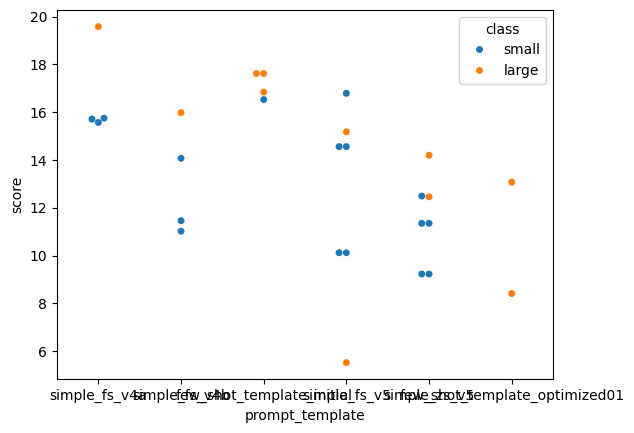

: 

In [ ]:
import seaborn as sns

sns.swarmplot(df_res, x="prompt_template", y="score", hue="class")

: 

# Runs on Test

In [ ]:

# runs = [
#     "TEST_naive_doctaet-simple_fs_v4a-mixtral8x22b-20240613-191825"
# ]

# df = load_run(runs[-1])
# df

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

: 

# Rerun post processing



In [221]:
# from src.content_extraction import format
# from src.dataset import LogResult


# GENERATE_FILES = True

# orig_run_id = "TEST_naive_doctaet-few_shot_template_initial-llama370b-20240614-131755"
# # orig_run_id = "TEST_naive_doctaet-few_shot_template_initial-llama370b-20240612-213042"
# from datetime import datetime

# now_str = datetime.now().strftime('%Y%m%d-%H%M%S')

# run_id = orig_run_id.rsplit("-", 2)[0] + "-" + now_str

# df = load_run(orig_run_id)
# logger = LogResult(run_id, save_interval=100, do_write=GENERATE_FILES, additional_col_names=["prompt", "raw", "ground_truth", "inference_s", "original_postproc"])
# for i, row in df.iterrows():
#     processed = format(row["raw"])
#     logger.log(row["f"], str(processed), row["prompt"], row["raw"], row["ground_truth"], row["inference_s"], row["annotation"])
#     pass

# df = logger.save()
# df

,run,f,annotation,prompt,raw,ground_truth,inference_s,original_postproc
0,TEST_naive_doctaet-few_shot_template_initial-l...,0806.2287,unanswerable\n,If the text reports benchmark leaderboard resu...,"Unfortunately, there are no specific tasks, da...",None,28.739118,unanswerable\n
1,TEST_naive_doctaet-few_shot_template_initial-l...,1412.3670,unanswerable\n,If the text reports benchmark leaderboard resu...,I'm ready to help. Please provide the text tha...,None,4.246193,unanswerable\n
2,TEST_naive_doctaet-few_shot_template_initial-l...,1001.3451,"[{'LEADERBOARD': {'Task': 'Bluetooth Traces', ...",If the text reports benchmark leaderboard resu...,"Based on the provided text, I will extract the...",None,23.884387,"[{'LEADERBOARD': {'Task': 'Bluetooth Traces', ..."
3,TEST_naive_doctaet-few_shot_template_initial-l...,1907.05888v1,[{'LEADERBOARD': {'Task': 'Congestive Heart Fa...,If the text reports benchmark leaderboard resu...,Here is the extracted information in the requi...,None,38.851409,[{'LEADERBOARD': {'Task': 'Congestive Heart Fa...
4,TEST_naive_doctaet-few_shot_template_initial-l...,1911.12667v3,[{'LEADERBOARD': {'Task': 'Action Recognition'...,If the text reports benchmark leaderboard resu...,Here is the extracted information in JSON form...,None,24.324206,[{'LEADERBOARD': {'Task': 'Action Recognition'...
...,...,...,...,...,...,...,...,...
784,TEST_naive_doctaet-few_shot_template_initial-l...,2010.14022v2,[{'LEADERBOARD': {'Task': 'Cover Song Identifi...,If the text reports benchmark leaderboard resu...,Here is the extracted information in JSON form...,None,37.346272,[{'LEADERBOARD': {'Task': 'Cover Song Identifi...
785,TEST_naive_doctaet-few_shot_template_initial-l...,1210.0408,unanswerable\n,If the text reports benchmark leaderboard resu...,Since the provided text does not report any be...,None,5.397896,unanswerable\n
786,TEST_naive_doctaet-few_shot_template_initial-l...,1604.03799,unanswerable\n,If the text reports benchmark leaderboard resu...,Since the provided text does not report any be...,None,6.556602,unanswerable\n
787,TEST_naive_doctaet-few_shot_template_initial-l...,0911.1502,[{'LEADERBOARD': {'Task': 'P2PTV Network Reven...,If the text reports benchmark leaderboard resu...,Here is the extracted information in the requi...,None,37.742783,[{'LEADERBOARD': {'Task': 'P2PTV Network Reven...
